In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Overview of Distributions

In [41]:
def plot_distribution(ax, x, y, density_fun, color=None, visibility=1, label=None, title=None, num_points = 100):
    
    # create grid for parameters (a,b)
    a_array = np.linspace(-4, 4, num_points)
    b_array = np.linspace(-4, 4, num_points)
    A_array, B_array = np.meshgrid(a_array, b_array)
    
    # evaluate density for every point in the grid and reshape bac
    Z = density_fun(x, y, A_array.ravel(), B_array.ravel())
    Z = Z.reshape((len(a_array), len(b_array)))
    
    # plot contour  
    ax.contour(a_array, b_array, np.exp(Z), colors=color, alpha=visibility)
    ax.plot([-1000], [-1000], color=color, label=label)
    ax.set(xlabel='slope', ylabel='intercept', xlim=(-4, 4), ylim=(-4, 4), title=title)

## Normal Distribution

## Poisson Distribution

The *poisson* dsitribution is used for *count* data and has the following form:
$$
f(k ; \lambda)=\operatorname{Pr}(X=k)=\frac{\lambda^k e^{-\lambda}}{k!},
$$
where
- $k$ is the number of occurrences $(k=0,1,2, \ldots)$
- $e$ is Euler's number $(e=2.71828 \ldots)$
- $k!=k(k-1) \cdots(3)(2)(1)$ is the factorial.

### Exam question

Consider the generalized linear model with a Poisson likelihood
$$
\begin{aligned}
y_n \mid \boldsymbol{w}, x_n & \sim \operatorname{Poisson}\left(\lambda_n\right) \\
\lambda_n & =e^{w_0+w_1 x_n} \\
\boldsymbol{w} & \sim \mathcal{N}\left(\mathbf{0}, \alpha^{-1} \boldsymbol{I}\right),
\end{aligned}
$$
where $\boldsymbol{w}=\left[w_0, w_1\right]$ for the following dataset $\mathcal{D}=\left\{x_n, y_n\right\}$, for $N=5$, where $\boldsymbol{x}=[1,2,4,8,10]$ and $\boldsymbol{y}=[5,4,1,0,0]$. Assume $\alpha=\frac{1}{4}$.

In [ ]:
# Data
x = np.array([1, 2, 4, 8, 10])
y = np.array([5, 4, 1, 0, 0])
alpha = 1/4

# plotting contours
# gamma prior
prior = lambda x, y, a, b: np.exp(stats.norm.logpdf(a, 0, 1/alpha)*x + stats.norm.logpdf(b, 0, 1/alpha))
likelihood = lambda x, y, a, b: np.sum(stats.norm.logpdf(y, a*x + b, 1))

# Defining ranges for w0 and w1
w0 = np.linspace(-3.5, 3.5, 100)
w1 = np.linspace(-3.5, 3.5, 100)


plot_distribution(plt, x, y, prior, color='blue', label='prior', title='Prior distribution')


## The Binomial distribution and maximum likelihood estimation

First we re-cap the ***Binomial distribution***. The Binomial distribution is a discrete probability distribution representing the number of successes in a sequence of **independent Bernoulli trials** and it is specified through its **probability mass function (PMF)**:

$$
\begin{align*}
p(y|N, \theta) &= \text{Bin}(y|N, \theta)\\
&= {N\choose y} \theta^{y}(1-\theta)^{N-y},
\end{align*}$$

where $N$ is the number of trials, $\theta \in \left[0, 1\right]$ is the probability of success in each individual trial and $y \in \left\lbrace 0, 1, \dots, N \right\rbrace$ is the total number of successes. The quantity ${N\choose y}$ is a called a binomial coefficient and is pronounced "$N$ choose $y$" and counts the number of ways $y$ items can be chosen from a set of $N$ items. The simplest way to estimate $\theta$ is through **maximum likelihood estimation (MLE)**, which for this model can be done analytically:

$$\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} p(y|N, \theta) = \frac{y}{N}.$$

We can also compute a classic/frequentist 95%-**confidence interval**:

$$\hat{\theta}_{\text{MLE}} \pm 1.96 \sqrt{\frac{\hat{\theta}_{\text{MLE}}(1-\hat{\theta}_{\text{MLE}})}{N}}.$$

Technically, this type of interval is called a **Wald interval** and relies on a Gaussian approximation, but we won't cover these details in this course. Note that a **confidence interval** is **generally not** the same as a **posterior credibility interval** (see Section 4.6.6 in Murphy1). 

### Exam question

Suppose the outcome of $N=31$ independent Bernoulli trials generated $y=7$ successes. Let $\theta \in[0,1]$ denote the probability of success. Assume a Binomial likelihood, i.e. $p(y \mid \theta)=\operatorname{Bin}(y \mid N, \theta)$ with the following prior distribution for $\theta$ :
$$
p(\theta)=\frac{3}{7} \operatorname{Beta}(\theta \mid 2,10)+\frac{4}{7} \operatorname{Beta}(\theta \mid 10,2)
$$

In [8]:
def compute_prior_probability(a1, b1, a2, b2, weight1, threshold=0.5):
    """
    Compute the probability that theta > threshold for a mixture of two beta distributions.
    
    Parameters:
    a1, b1 : parameters for the first beta distribution.
    a2, b2 : parameters for the second beta distribution.
    weight1 : weight for the first beta distribution in the mixture.
    threshold : threshold value to compute the probability for theta > threshold.
    
    Returns:
    Probability that theta > threshold.
    """
    weight2 = 1 - weight1
    prob1 = 1 - stats.beta.cdf(threshold, a1, b1)
    prob2 = 1 - stats.beta.cdf(threshold, a2, b2)
    return weight1 * prob1 + weight2 * prob2

# Parameters as per the problem statement
a1, b1 = 2, 10
a2, b2 = 10, 2
weight1 = 3/7

# Computing the probability that theta > 0.5
probability = compute_prior_probability(a1, b1, a2, b2, weight1)
print(f"The prior probability that theta > 0.5 is approximately {probability:.4f}")

The prior probability that theta > 0.5 is approximately 0.5706


Marginal likelihood of the binomial likelihood is:


In [33]:
x

array([[0.00000000e+00],
       [1.00010001e-04],
       [2.00020002e-04],
       ...,
       [9.99799980e-01],
       [9.99899990e-01],
       [1.00000000e+00]])

/var/folders/1q/c4zn0_y541q9hpfms4qtj67m0000gn/T/ipykernel_75113/893354120.py:2: RuntimeWarning: divide by zero encountered in log
  density_fun = lambda x, y, a, b: np.log(weight1 * stats.beta.pdf(x, a1, b1) + (1 - weight1) * stats.beta.pdf(x, a2, b2))


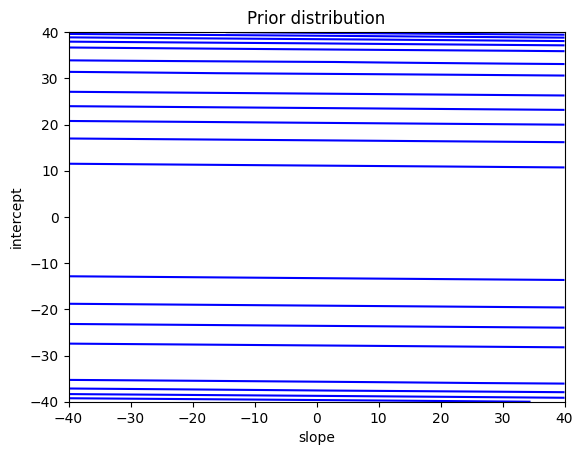